In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
heart_data = pd.read_csv("heart.csv")

print(heart_data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
# Extract features and target variable
X = heart_data.drop('output', axis=1)
y = heart_data['output']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train KNN model and evaluate accuracy for different values of k
def knn_model_and_evaluate(k_values):
    accuracies = []
    
    for k in k_values:
        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        
        # Predictions on the test set
        y_pred = knn_model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Accuracy for k={k}: {accuracy:.4f}")
    
    return accuracies

In [7]:
# Compare accuracies for k = 5, 7, sqrt(n)
k_values = [5, 7, int(np.sqrt(len(X_train)))]
accuracies = knn_model_and_evaluate(k_values)

Accuracy for k=5: 0.9016
Accuracy for k=7: 0.9180
Accuracy for k=15: 0.8689


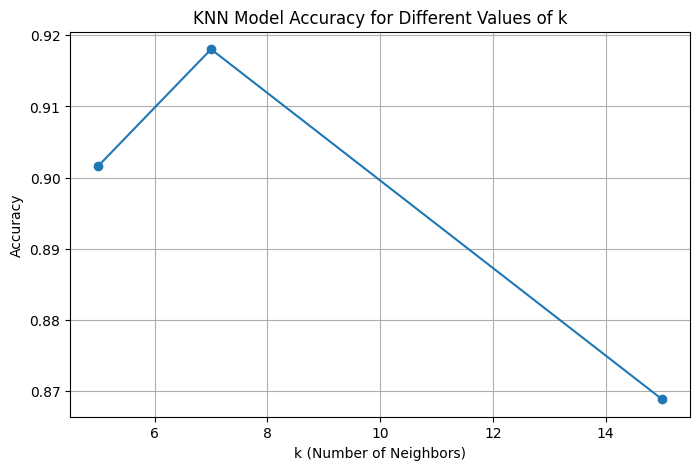

In [8]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Model Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()